In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

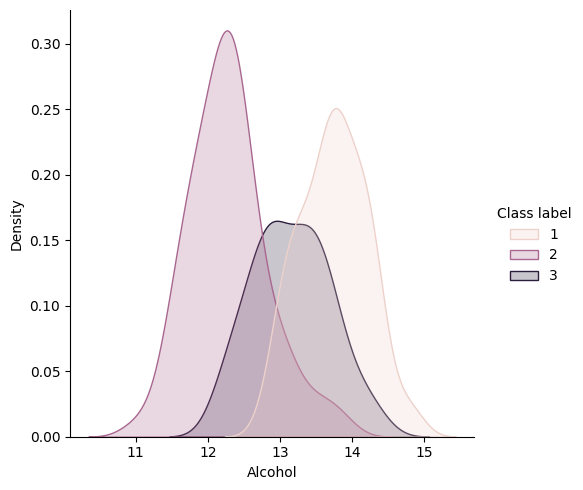

In [ ]:
df = pd.read_csv('Wine_data.csv',header=None,usecols=[0,1,2]) # this csv does not have header row
df.columns=['Class label', 'Alcohol', 'Malic acid'] # now we are adding the header or column names
df.head()

#kde plot or displot show disturibution of probability 
sns.displot(df, x='Alcohol',hue='Class label', kind='kde', fill=True)


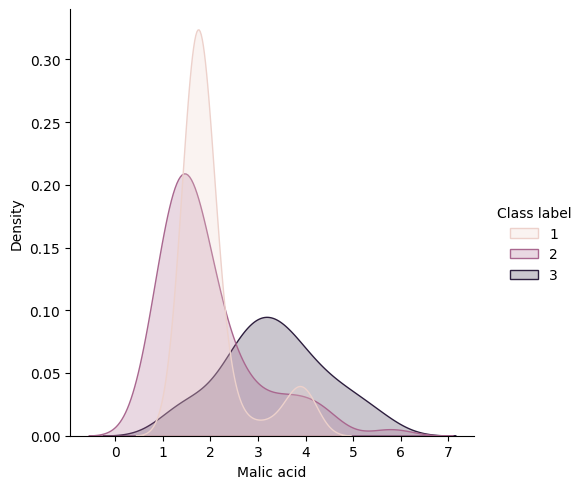

In [8]:
#kde plot or displot show disturibution of probability 
sns.displot(df, x='Malic acid',hue='Class label', kind='kde', fill=True)

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Class label', axis=1,inplace=False)
Y = df['Class label']
print(X.head())
print(Y.head())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

   Alcohol  Malic acid
0    14.23        1.71
1    13.20        1.78
2    13.16        2.36
3    14.37        1.95
4    13.24        2.59
0    1
1    1
2    1
3    1
4    1
Name: Class label, dtype: int64


((124, 2), (54, 2), (124,), (54,))

# Normalization - Min Max Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# fit the scaler to the training data
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# transform funcion will return numpy array, so need to convert it into dataframe
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled.head())
print(X_test_scaled.head())

    Alcohol  Malic acid
0  0.720430    0.203782
1  0.319892    0.084034
2  0.602151    0.712185
3  0.572581    0.563025
4  0.760753    0.130252
    Alcohol  Malic acid
0  0.728495    0.163866
1  0.473118    0.373950
2  0.360215    0.050420
3  0.680108    0.176471
4  0.543011    1.031513


In [13]:
# look at the effect of scaler 
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


## Now look at the effect of scaling with plotting

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Malic acid'>

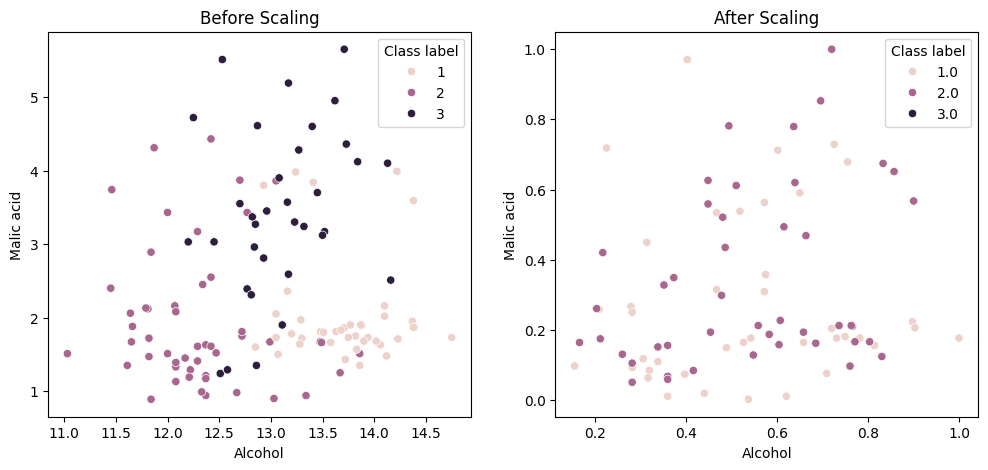

In [20]:
# No effect in scatter plot as it is linear transformation
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.scatterplot(data=X_train,x=X_train['Alcohol'], y=X_train['Malic acid'], hue=Y_train, ax=ax1)
ax2.set_title('After Scaling')
sns.scatterplot(data=X_train_scaled, x='Alcohol', y='Malic acid', hue=Y_train, ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

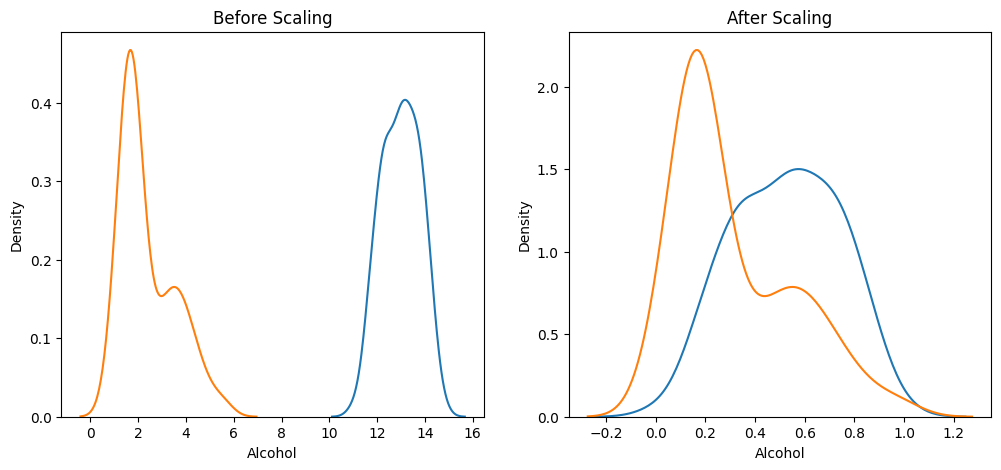

In [22]:
# Now look at the effect with kde plot 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax2.set_title('After Scaling')  
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)